# Metacritic_Critic_Reviews

In [1]:
import matplotlib     # To begin this exploratory analysis
import numpy as np    # first import libraries and define functions for plotting the data using matplotlib.
import pandas as pd
import os

Set default figuresize and font value

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)   # set figure size

font = {'family' : 'monospace',    # Set font of matplotlib
        'weight' : 'bold',
        'size'   : 13}
matplotlib.rc('font', **font)    # apple font

### Reading the Data

In [3]:
review_data = pd.read_csv("metacritic_critic_reviews.csv")    # reading data from csv
review_data.iloc[0:20]     # iloc first 20 rows of csv

,name,review,game,platform,score,date
0,LEVEL (Czech Republic),"Portal 2 is a masterpiece, a work of art that ...",Portal 2,PC,100.0,"May 25, 2011"
1,GameCritics,So do we need Portal 2? Do I need it? Maybe no...,Portal 2,PC,100.0,"May 8, 2011"
2,PC Games (Russia),Portal 2 exceeds every expectation. It has a s...,Portal 2,PC,100.0,"May 6, 2011"
3,Adventure Gamers,"Like its predecessor, Portal 2 is not an adven...",Portal 2,PC,100.0,"Apr 29, 2011"
4,Armchair Empire,"Pile on the ""Oh, yes!"" moments of solving some...",Portal 2,PC,100.0,"Apr 28, 2011"
5,Game Revolution,"Impatience aside, Portal 2 is an exceptionally...",Portal 2,PC,100.0,"Apr 22, 2011"
6,GameSpy,Sporting some of the best writing and voice wo...,Portal 2,PC,100.0,"Apr 22, 2011"
7,DarkZero,"In conclusion, Portal 2 is a textbook example ...",Portal 2,PC,100.0,"Apr 21, 2011"
8,GamesRadar+,"Portal 2 couldn't be Portal, but it's the next...",Portal 2,PC,100.0,"Apr 21, 2011"
9,Destructoid,"Without a doubt, one of the best games ever ma...",Portal 2,PC,100.0,"Apr 21, 2011"


## Data shape

In [4]:
nRow, nCol = review_data.shape    # Get number of rows and colomns of reviews data
print(f'There are {nRow} rows and {nCol} columns')  # print rows and colomns

There are 125876 rows and 6 columns


## Drop duplicates

In [5]:
len_duplicate = len(review_data.review.unique())     # Get duplicate review data
review_data = review_data.drop_duplicates()       # drop duplicate review data

## Platform Distribution graphs 

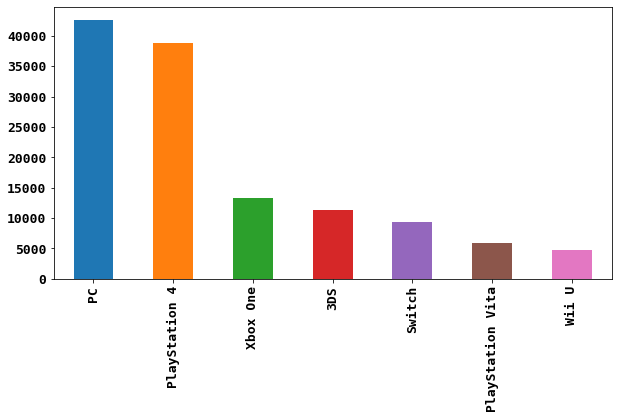

In [6]:
review_data['platform'].value_counts().plot(kind='bar')     # Counting numbers of platform about games

## Game Distribution graphs of head 1000 rows

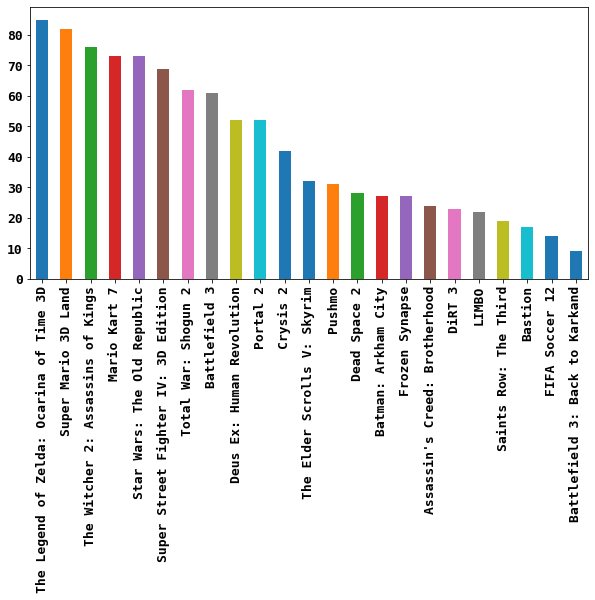

In [7]:
review_data.head(1000)['game'].value_counts().plot(kind='bar')  # To simplify the distribution graphs, we utilize head 1000 rows to build graph

## Score Distribution graphs 


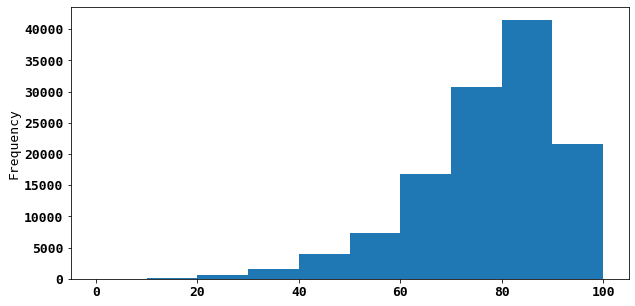

In [8]:
review_data['score'].plot(kind='hist') # Showing the frequency of the fractional segment of review scores

## Mean, Max, Min score

In [9]:
score_mean = review_data['score'].mean()   # mean score of game reviews
score_max = review_data['score'].max()     # max score of game reviews
score_min = review_data['score'].min()     # min score of game reviews

print(f'Mean score is {score_mean}')
print(f'Max score is {score_max}')
print(f'Min score is {score_min}')

Mean score is 74.4948146717836
Max score is 100.0
Min score is 0.0


## Top 20 Game
### Which are the most popular games？

In [10]:
gamescore = review_data.groupby("game").mean()     # select game group by mean score
top_gamescore = gamescore.sort_values(by = "score", ascending=False).iloc[0:20]  # first 20 rows of games of high scores
print(top_gamescore) #show off

                                             score
game                                              
Red Dead Redemption 2                    96.816794
The Legend of Zelda: Breath of the Wild  96.745902
Grand Theft Auto V                       96.437956
Super Mario Odyssey                      96.088496
Portal 2                                 94.538462
The Last of Us Remastered                94.405797
God of War                               94.296610
The Legend of Zelda: Ocarina of Time 3D  94.094118
BioShock Infinite                        93.514706
Divinity: Original Sin II                93.305556
Persona 4 Golden                         93.295082
Uncharted 4: A Thief's End               93.035398
Super Smash Bros. Ultimate               92.897959
Super Mario 3D World                     92.879518
Persona 5                                92.814433
Metal Gear Solid V: The Phantom Pain     92.550459
Journey                                  92.533333
The Witcher 3: Wild Hunt       

## Best game review

In [11]:
bestgame_review = review_data[(review_data["game"] == "Red Dead Redemption 2")]  # The game of best mean score is Red Dead Redemption
print(bestgame_review["review"])         # We extract the review information of the game of best mean score
bestgame_review["review"].to_csv("review.txt")  # Export it to txt file

104721    Unquestionably 2018's best game, and an all-ti...
104722    It doesn’t matter if you are gamer, a human be...
104723    Red Dead Redemption 2 is technically impressiv...
104724    Red Dead Redemption 2 is likely to go down as ...
104725    Red Dead Redemption 2 lives up to everything a...
104726    Rockstar knows quality like no other. Develope...
104727    Red Dead Redemption 2's vast, detailed and stu...
104728    By whatever standard you want to apply, Red De...
104729    Red Dead Redemption 2 isn't just a masterwork ...
104730    Red Dead Redemption 2 is Rockstar's greatest g...
104731    Red Dead Redemption 2 offers an unprecedented ...
104732    Despite some minor issues like stuttering in i...
104733    This place Rockstar has crafted; the dewy plai...
104734    Red Dead Redemption 2 delivers the goods in a ...
104735    Thanks to both its shocking cruelty and its aw...
104736    One of the top three open-worlds of all time, ...
104737    Red Dead Redemption 2 stands s

## What do the reviews expresses to the best game ?
- Word cloud to show the content

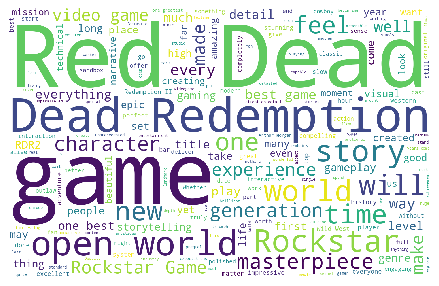

In [12]:
from wordcloud import WordCloud
f = open(u'./review.txt','r',encoding='utf-8').read()   # Utilize the txt file to generate a wordcloud as shown below
wordcloud = WordCloud(
        background_color="white", 
        width=1500,              
        height=960,              
        margin=10               
        ).generate(f)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()